# Working_with_pandas(concat)
bfill, str.split,str.strip,concat

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
sales1 = pd.read_csv('sales1.csv')
sales1

,Book title,Number sold,Sales price,Royalty paid
0,The Bricklayer’s Bible,8,2.99,0.55
1,Swimrand,2,1.99,0.35
2,Pining For The Fisheries of Yore,28,2.99,0.55
3,The Duck Goes Here,34,2.99,0.55
4,The Tower Commission Report,4,11.50,4.25


In [4]:
sales2 = pd.read_csv('sales2.csv')
sales2.fillna('')

,Title,Units sold,List price,Royalty
0,,,,
1,Sales report for Q4,,,
2,E-Book Reader US Store,,,
3,Pining for the Fisheries of Yore,80,3.5,14.98
4,Swimrand,1,2.99,0.14
5,The Bricklayer's Bible,17,3.5,5.15
6,The Duck Goes Here,34,2.99,5.78
7,The Tower Commission Report,4,9.5,6.2
8,US royalties (USD),,,32.25
9,,,,


### Challenge: first combine these sales together into a single dataframe, then compute how much money consumers spent on each book in each currency.

In [5]:
sales1.columns

Index(['Book title', 'Number sold', 'Sales price', 'Royalty paid'], dtype='object')

In [6]:
df1 = sales1.rename(columns={
    'Book title': 'title',
    'Number sold': 'number',
    'Sales price': 'their_price',
    'Royalty paid': 'we_got',
    })

In [7]:
df1.head()

,title,number,their_price,we_got
0,The Bricklayer’s Bible,8,2.99,0.55
1,Swimrand,2,1.99,0.35
2,Pining For The Fisheries of Yore,28,2.99,0.55
3,The Duck Goes Here,34,2.99,0.55
4,The Tower Commission Report,4,11.50,4.25


In [8]:
# Add currency feature
df1['currency'] = 'USD'
df1

,title,number,their_price,we_got,currency
0,The Bricklayer’s Bible,8,2.99,0.55,USD
1,Swimrand,2,1.99,0.35,USD
2,Pining For The Fisheries of Yore,28,2.99,0.55,USD
3,The Duck Goes Here,34,2.99,0.55,USD
4,The Tower Commission Report,4,11.50,4.25,USD


In [9]:
sales2.columns

Index(['Title', 'Units sold', 'List price', 'Royalty'], dtype='object')

In [10]:
sales2.head()

,Title,Units sold,List price,Royalty
0,NaN,NaN,NaN,NaN
1,Sales report for Q4,NaN,NaN,NaN
2,E-Book Reader US Store,NaN,NaN,NaN
3,Pining for the Fisheries of Yore,80.0,3.50,14.98
4,Swimrand,1.0,2.99,0.14


In [11]:
# Adding features
s = sales2.copy()
t = sales2['Title']
t.head()

0                                 NaN
1                 Sales report for Q4
2              E-Book Reader US Store
3    Pining for the Fisheries of Yore
4                            Swimrand
Name: Title, dtype: object

In [12]:
t = t.where(t.str.endswith(')')).str.split().str[-1].str.strip('()')
t.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Title, dtype: object

In [13]:
s['currency'] = t.fillna(method='bfill') #backward fill

In [14]:
s = s[s['List price'].notnull()]

In [15]:
df2 = s.rename(columns={
    'Units sold': 'number',
    'Title': 'title',
    'List price': 'their_price',
    'Royalty': 'we_got',
    })
s.head()

,Title,Units sold,List price,Royalty,currency
3,Pining for the Fisheries of Yore,80.0,3.50,14.98,USD
4,Swimrand,1.0,2.99,0.14,USD
5,The Bricklayer's Bible,17.0,3.50,5.15,USD
6,The Duck Goes Here,34.0,2.99,5.78,USD
7,The Tower Commission Report,4.0,9.50,6.20,USD


In [16]:
df = pd.concat([df1, df2])
df

,title,number,their_price,we_got,currency
0,The Bricklayer’s Bible,8.0,2.99,0.55,USD
1,Swimrand,2.0,1.99,0.35,USD
2,Pining For The Fisheries of Yore,28.0,2.99,0.55,USD
3,The Duck Goes Here,34.0,2.99,0.55,USD
4,The Tower Commission Report,4.0,11.50,4.25,USD
3,Pining for the Fisheries of Yore,80.0,3.50,14.98,USD
4,Swimrand,1.0,2.99,0.14,USD
5,The Bricklayer's Bible,17.0,3.50,5.15,USD
6,The Duck Goes Here,34.0,2.99,5.78,USD
7,The Tower Commission Report,4.0,9.50,6.20,USD


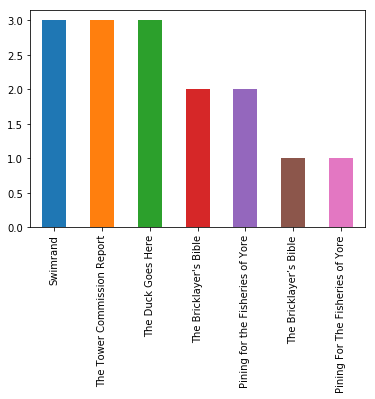

In [17]:
df.title.value_counts().plot(kind='bar')

In [18]:
# First try: differences in case and punctuation
# make some books look like two different entries.

t = df
t = t.assign(total_paid=t.their_price * t.number)# Assign new columns to a DataFrame
t.head()

,title,number,their_price,we_got,currency,total_paid
0,The Bricklayer’s Bible,8.0,2.99,0.55,USD,23.92
1,Swimrand,2.0,1.99,0.35,USD,3.98
2,Pining For The Fisheries of Yore,28.0,2.99,0.55,USD,83.72
3,The Duck Goes Here,34.0,2.99,0.55,USD,101.66
4,The Tower Commission Report,4.0,11.50,4.25,USD,46.00


In [19]:
t.groupby(['title', 'currency'])[['total_paid']].sum() # multi-indexing

total_paid
title                            currency            
Pining For The Fisheries of Yore USD            83.72
Pining for the Fisheries of Yore GBP           140.53
                                 USD           280.00
Swimrand                         EUR            15.92
                                 USD             6.97
The Bricklayer's Bible           GBP            50.83
                                 USD            59.50
The Bricklayer’s Bible           USD            23.92
The Duck Goes Here               EUR            23.88
                                 USD           203.32
The Tower Commission Report      GBP            26.00
                                 USD            84.00

In [20]:
# Second try: make book titles match by fixing differences
# in casing and punctuation.

t = df
t = t.assign(total_paid=t.their_price * t.number)
t = t.assign(title_fixed=t['title'].str.lower().str.replace("’", "'"))
t.head()

,title,number,their_price,we_got,currency,total_paid,title_fixed
0,The Bricklayer’s Bible,8.0,2.99,0.55,USD,23.92,the bricklayer's bible
1,Swimrand,2.0,1.99,0.35,USD,3.98,swimrand
2,Pining For The Fisheries of Yore,28.0,2.99,0.55,USD,83.72,pining for the fisheries of yore
3,The Duck Goes Here,34.0,2.99,0.55,USD,101.66,the duck goes here
4,The Tower Commission Report,4.0,11.50,4.25,USD,46.00,the tower commission report


In [21]:
t.groupby(['title_fixed', 'currency'])[['total_paid']].sum()

total_paid
title_fixed                      currency            
pining for the fisheries of yore GBP           140.53
                                 USD           363.72
swimrand                         EUR            15.92
                                 USD             6.97
the bricklayer's bible           GBP            50.83
                                 USD            83.42
the duck goes here               EUR            23.88
                                 USD           203.32
the tower commission report      GBP            26.00
                                 USD            84.00